In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [226]:
walmart_dt=pd.read_csv("Walmart_Store_sales.csv")

In [227]:
walmart_dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [228]:
walmart_dt.shape

(6435, 8)

In [229]:
walmart_dt.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


# Which store has maximum sales


In [230]:
walmart_dt_grouped=walmart_dt.groupby('Store')['Weekly_Sales'].sum()

print("Store No. {} has the maximum  total sales of {}".format(walmart_dt_grouped.idxmax(),walmart_dt_grouped.max()))

Store No. 20 has the maximum  total sales of 301397792.46000004


# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation


In [231]:
walmart_dt_std=walmart_dt.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store No. {} has the maximum standard deviation of {}".format(walmart_dt_std['Weekly_Sales'].idxmax(),
                                                                     walmart_dt_std['Weekly_Sales'].max()))

Store No. 14 has the maximum standard deviation of 317569.9494755081


In [232]:
walmart_dt_coef_mean=walmart_dt.groupby('Store').agg({'Weekly_Sales':['mean','std']})
walmart_dt_coef_mean.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

# Which store/s has good quarterly growth rate in Q3’2012


In [233]:
walmart_dt_Q3_2012=walmart_dt[(pd.to_datetime(walmart_dt['Date'])>=pd.to_datetime('07-01-2012')) &
                              (pd.to_datetime(walmart_dt['Date'])<=pd.to_datetime('09-30-2012'))]

walmart_dt_growth_Q32012=walmart_dt_Q3_2012.groupby(['Store'])['Weekly_Sales'].sum()

print("Store no. {} has the maximum growth during Q'3 2012 with total sales of {}".format(walmart_dt_growth_Q32012.idxmax()
                                                                                         ,walmart_dt_growth_Q32012.max()))

Store no. 4 has the maximum growth during Q'3 2012 with total sales of 25652119.35


# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


In [234]:
# Holiday Events

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13




In [235]:
store_holiday_sales=walmart_dt[walmart_dt['Holiday_Flag']==1]

store_nonholiday_sales=walmart_dt[walmart_dt['Holiday_Flag']==0]

#Super Bowl
stores_holiday_sales_superBowl =store_holiday_sales[(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('12-02-2010'))
                                                    | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('11-02-2011'))
                                                    | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('10-02-2012'))
                                                    | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('08-02-2013'))]

#Labour Day
stores_holiday_sales_Labour_day=store_holiday_sales[(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('10-09-2010'))
                                                     | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('09-09-2011'))
                                                    | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('07-09-2012'))
                                                    | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('06-09-2013'))]

#Thanksgiving
stores_holiday_sales_thanksgiving=store_holiday_sales[(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('26-11-2010'))
                                                     | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('25-11-2011'))
                                                     | (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('23-11-2012'))
                                                     |  (pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('29-11-2013'))]

#Christmas
stores_holiday_sales_christmas=store_holiday_sales[(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('31-12-2010'))
                                                  |(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('30-12-2011'))
                                                  |(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('28-12-2012'))
                                                  |(pd.to_datetime(store_holiday_sales['Date'])==pd.to_datetime('27-12-2012'))]


stores_nonholiday_sales_mean = store_nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()

stores_Holiday_sales_sum=store_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

for row in stores_Holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("on this date {} Holiday Sales was Greater than the Non-Holiday Sales & the Sales was {}".format(row.Date,round(row.Weekly_Sales,2))) 
            break;
            

on this date 07-09-2012 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 48330059.31
on this date 09-09-2011 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 46763227.53
on this date 10-02-2012 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 50009407.92
on this date 10-09-2010 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 45634397.84
on this date 11-02-2011 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 47336192.79
on this date 12-02-2010 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 48336677.63
on this date 25-11-2011 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 66593605.26
on this date 26-11-2010 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 65821003.24
on this date 30-12-2011 Holiday Sales was Greater than the Non-Holiday Sales & the Sales was 46042461.04
on this date 31-12-2010 Holiday Sales was Greater than 

In [236]:
print("Super Bowl Sales {}".format(stores_holiday_sales_superBowl['Weekly_Sales'].sum()))
print("\nLabour Day Sales {}".format(stores_holiday_sales_Labour_day['Weekly_Sales'].sum()))
print("\nThanksGiving Day Sales {}".format(stores_holiday_sales_thanksgiving['Weekly_Sales'].sum()))
print("\nChristmas Day sales {}".format(stores_holiday_sales_christmas['Weekly_Sales'].sum()))

Super Bowl Sales 145682278.34

Labour Day Sales 140727684.68

ThanksGiving Day Sales 132414608.5

Christmas Day sales 86474980.03999999


# Statistical Model



For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact 

In [237]:

from sklearn.model_selection import train_test_split
train_x,test_y=train_test_split(walmart_dt,test_size=.30,random_state=2020)



In [238]:
import statsmodels.formula.api as sm
model=sm.ols(formula='Weekly_Sales ~ CPI+Unemployment+Fuel_Price',data=train_x)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     38.11
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           2.60e-24
Time:                        13:05:53   Log-Likelihood:                -65985.
No. Observations:                4504   AIC:                         1.320e+05
Df Residuals:                    4500   BIC:                         1.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.772e+06   9.49e+04     18.677      0.000    1.59e+06    1.96e+06
CPI          -1711.4562    226.134     -7.568      0.000   -2154.790   -1268.123
Unemployment -4.439e+04   4648.164     -9.550      0.000   -5.35e+04   -3.53e+04
Fuel_Price    -2.19e+04   1.84e+04     -1.192      0.233   -5.79e+04    1.41e+04
==============================================================================
Omnibus:                      226.136   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.097
Skew:                           0.586   Prob(JB):                     3.32e-57
Kurtosis:                       2.883   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
walmart_dt['Day']=pd.to_datetime(walmart_dt['Date']).dt.day_name()
walmart_dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday


In [240]:
def toName(Name):
    if Name==0:
        return "Non-Holiday"
    else:
        return "Holiday"

In [241]:
walmart_dt['Holiday_Flag']=walmart_dt['Holiday_Flag'].apply(toName)

In [242]:
walmart_dt['Holiday_Flag'].head()

0    Non-Holiday
1        Holiday
2    Non-Holiday
3    Non-Holiday
4    Non-Holiday
Name: Holiday_Flag, dtype: object

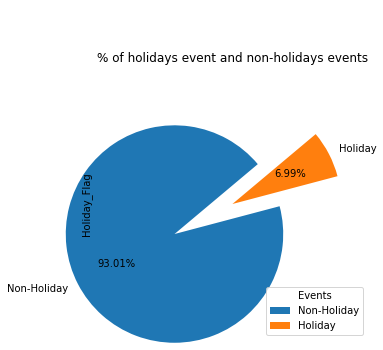

In [243]:
walmart_dt['Holiday_Flag'].value_counts().plot(kind='pie',autopct="%1.2f%%",figsize=(5,5),startangle=40,labels=walmart_dt['Holiday_Flag'],explode=(0.6,0))
plt.title("\n\n\n% of holidays event and non-holidays events")
plt.legend(walmart_dt['Holiday_Flag'],loc="lower right",title='Events')
plt.show()

In [244]:
walmart_dt['Holiday_Flag']=np.where(walmart_dt['Holiday_Flag']=="Non-Holiday",0,1)

In [245]:
walmart_dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday


# Now let's try to predict our Week Sales using the Linear Regression Algorithm.

In [246]:
walmart_dt.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day'],
      dtype='object')

In [247]:
#Converting the Float type to integer as linear regression can't handle float values

In [248]:
# walmart_dt['Weekly_Sales']=walmart_dt['Weekly_Sales'].astype(np.int64)
# walmart_dt['Temperature']=walmart_dt['Temperature'].astype(np.int64)
# walmart_dt['Fuel_Price']=walmart_dt['Fuel_Price'].astype(np.int64)
# walmart_dt['CPI']=walmart_dt['CPI'].astype(np.int64)
# walmart_dt['Unemployment']=walmart_dt['Unemployment'].astype(np.int64)

In [249]:
walmart_dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday


In [260]:
X=walmart_dt.drop(['Weekly_Sales','Date','Day'],axis=1)
y=walmart_dt['Weekly_Sales']

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=12)

In [272]:
from sklearn.linear_model import LinearRegression
lin_mod=LinearRegression(fit_intercept=True,n_jobs=-1)
lin_mod.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [273]:
pred=lin_mod.predict(X_test)

# Check for Accuracy for the model

In [283]:
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,adjusted_rand_score

In [275]:
r2_score(Y_test,pred)
#np.sqrt(mean_squared_error(Y_test,pred))

0.14571852913299155

In [277]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [278]:
pred_reg=reg.predict(X_test)

In [282]:
r2_score(Y_test,pred_reg)

0.9282655591509646

# We can see and conclude that our R2 score using Linear Regression is 0.14 and while using RandomForest Regressor we were able to get R2 score of 0.92 which is pretty excellent, So we can go for RandomForest Regressor model